# Problem Statement:

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score 


In [2]:
dta =sm.datasets.fair.load_pandas().data

In [3]:
#add "affair" column: 1 represents having affairs, 0represents not 
dta['affair'] = (dta.affairs >0).astype(int)

In [15]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children +  religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [5]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')


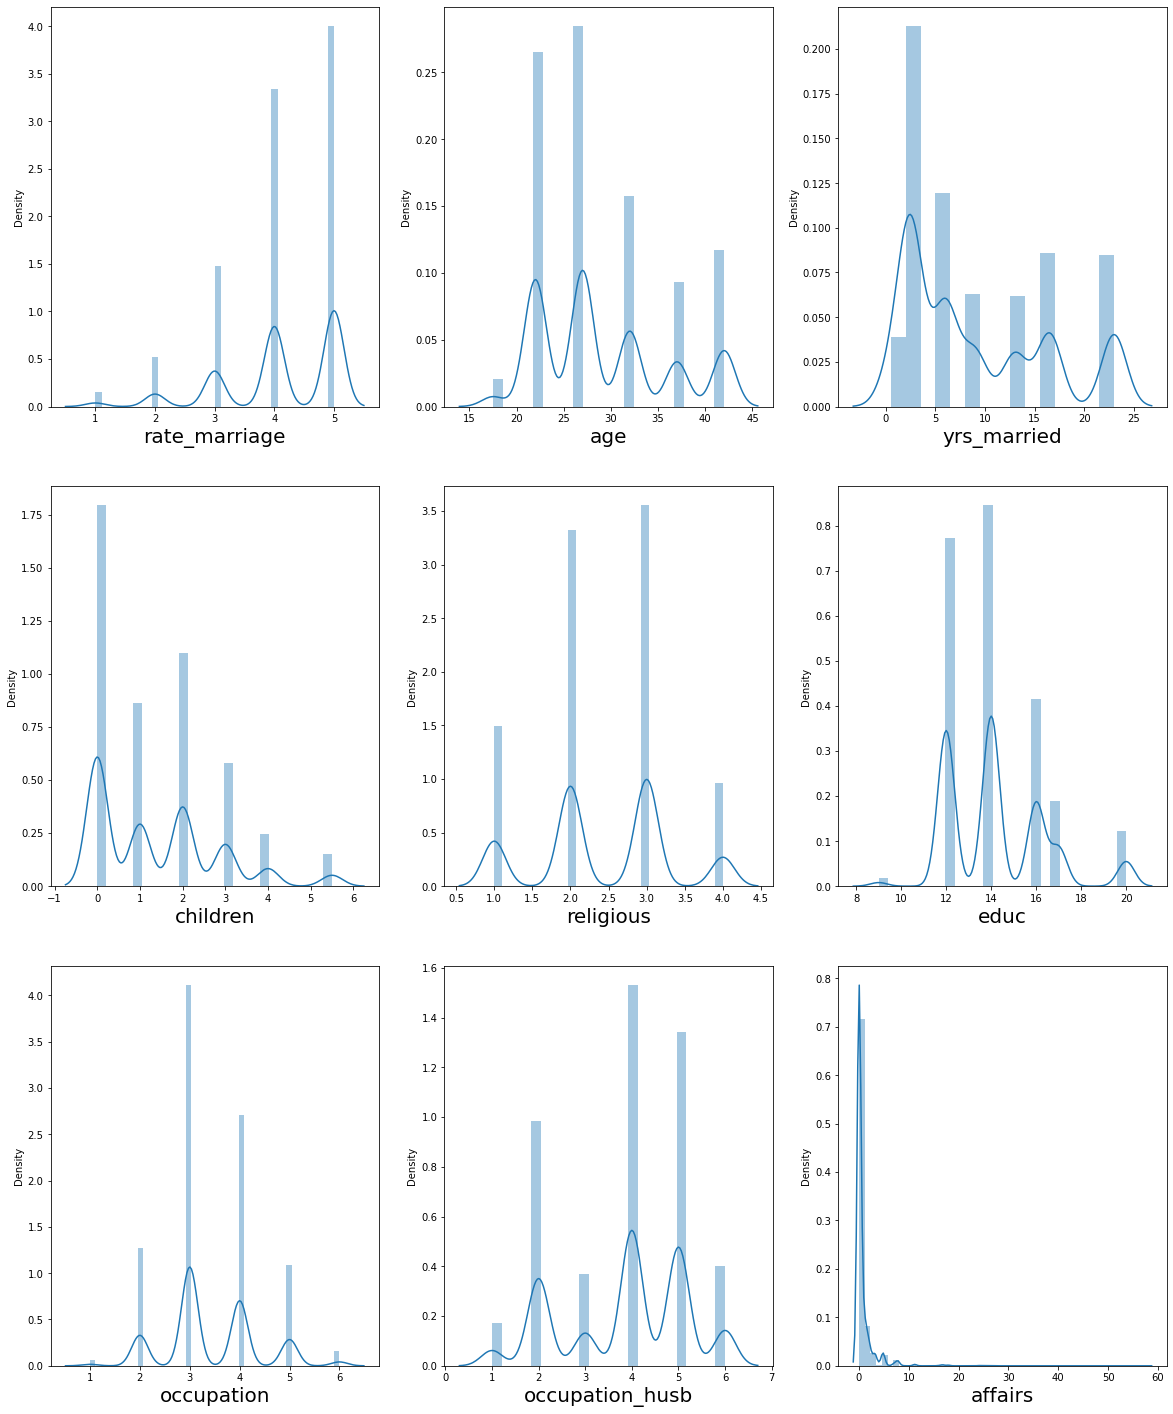

In [8]:
#See how the data is distributesd with each column
import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
Plotnumber=1

for column in dta:
    if Plotnumber <=9:
        ax = plt.subplot(3,3,Plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    Plotnumber+=1
plt.show()
    

In [9]:
#here we see if our dataset is balanced
print(dta[dta['affair']==0].shape)
print(dta[dta['affair']==1].shape)

(4313, 10)
(2053, 10)


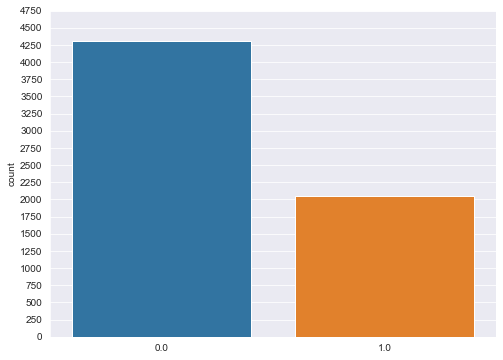

In [10]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))# converting y into array form to plot
plt.yticks(range(0,5000,250)) 
plt.show()

[Text(0.5, 1.0, 'Marriage Rating')]

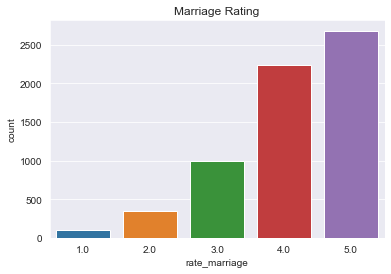

In [17]:
sns.countplot(x=dta["rate_marriage"]).set(title = 'Marriage Rating')

[Text(0.5, 1.0, "Distribution of Women's Age")]

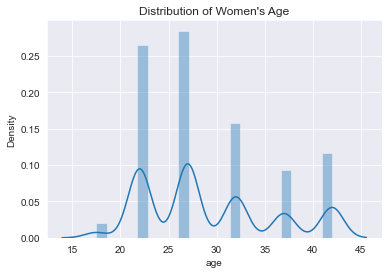

In [18]:
sns.distplot(dta["age"]).set(title = "Distribution of Women's Age")

[Text(0.5, 1.0, 'Number of Children')]

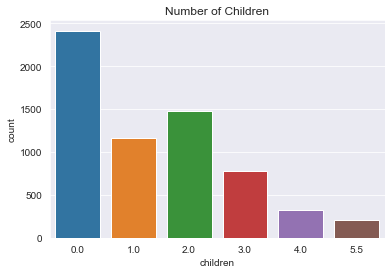

In [19]:
sns.countplot(x=dta["children"]).set(title = 'Number of Children')

<AxesSubplot:xlabel='religious', ylabel='count'>

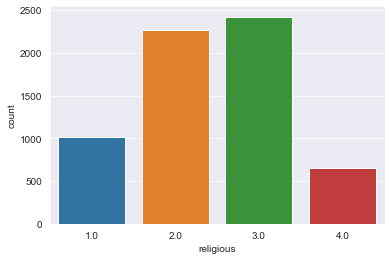

In [20]:
sns.countplot(x=dta["religious"])

[Text(0.5, 1.0, 'Education Level')]

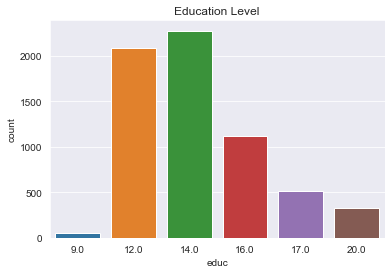

In [21]:
sns.countplot(x=dta["educ"]).set(title = "Education Level")

[Text(0.5, 1.0, "Women's Occupation")]

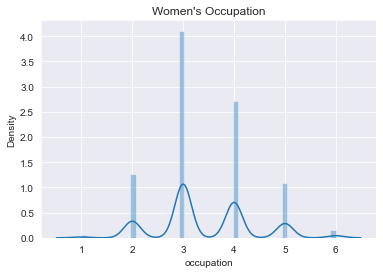

In [22]:
sns.distplot(dta["occupation"]).set(title = "Women's Occupation")

[Text(0.5, 1.0, "Husband's Occupation")]

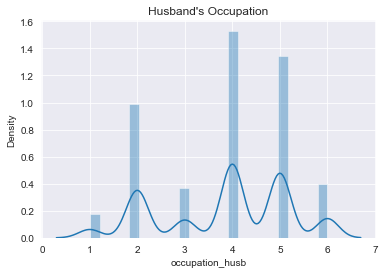

In [23]:
sns.distplot(dta["occupation_husb"]).set(title = "Husband's Occupation")

<AxesSubplot:>

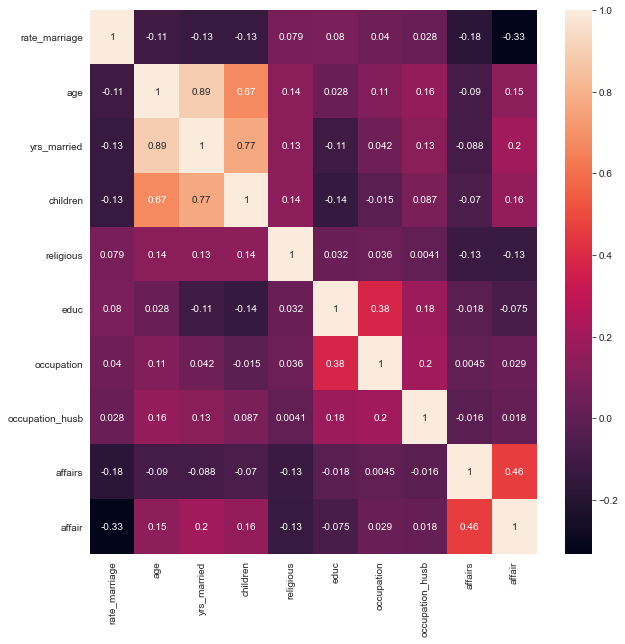

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(dta.corr(),annot=True)

In [25]:
# Spliting dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
print(f'Shape of train feature:{X_train.shape}')
print(f'Shape of test feature :{X_test.shape}')
print(f'Shape of train target :{y_train.shape}')
print(f'Shape of test target  :{y_test.shape}')

Shape of train feature:(4456, 17)
Shape of test feature :(1910, 17)
Shape of train target :(4456,)
Shape of test target  :(1910,)


In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter


import scikitplot.metrics as skplt

In [28]:
# Instantiating Logistic regression model
model_lr =LogisticRegression()
# Fitting on train data
model_lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
# Predicting on test dataset
y_pred = model_lr.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

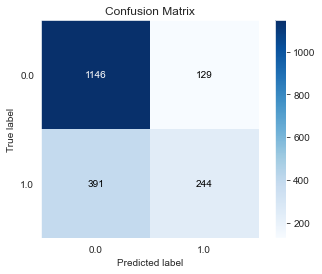

In [30]:
# Plotting the confusion matrix
skplt.plot_confusion_matrix(y_test ,y_pred)

In [31]:
accuracy_score(y_test,y_pred)

0.7277486910994765